## Importing Necessary Libraries

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## Discrete Choice Experiment Design

For designing the Questionnaire, since it's about measuring the preference level of the several indicators of poverty. I decided to go about using the `Discrete Choice Model`to come up with the `best` design to find out this preference level.

Here our indicators are:
- Nutrition
- ... total 15 indicators

Each of them has $2$ levels as per the existing MPI framework i.e. either a person has it or does not has it.

So, we can have a total of $2^15$ profiles, where profile is a person's assignment of all these indicators i.e. say if there is a person $A$ (imaginary) and his assignment of all these indicators the vector $(1,0,1,1,0,..,1)$. Then this is one profile.

We will place these profiles in choice sets (i.e. say person $A$ is to be ranked in a set which contains person $B$ and $C$ with different profiles). Then this set of size of $3$ is a choice set consisting $3$ profiles.

Now I will design these choice sets (of size $3$) which will contain these profiles. And these are to be ranked. The optimality criteria I will choose is the $D-Optimality\enspace Criterion$. More on it below.

Statistically, the design is often compared to the variance-covariance matrix of parameter estimates and the best design is a design that is able to minimize the matrix of variance-covariance. The most commonly used approach to obtain a small variance-covariance matrix is to minimize its determinant, or equivalently, to maximize the determinant of the information matrix of parameter $\beta$.

$$D-Optimality\enspace Criterion = |X'X - \sum_{i=1}^S J^{-1}(X'_i1_J)(1'_JX_i)|$$

where, $S$ is the number of choice sets in the DCE Design, $J$ is the number of profiles in the choice set, $X_i$ is the matrix of dimension $J\times P$ ($P$ be the number of attribute given in each choice set) which indicates the levels of indicator given for each profile for each attribute in the $i^{th}$ choice set, $1_J$ is the J-dimensional vector of all $1$s and $X = [X'_1, \dots, X'_S]'$. So, the dimension of $X$ is $S\cdot J \times P$

**Assumptions:**
- The number of profiles in each choice set is same (constant).

Below, is the `D-Optimality Criterion` calculation function.

In [251]:
def d_optimal_criterion(X, J, P, S):
  '''
  returns the D-Optimal Criterion value for design matrix X
  :args:
  - X: dimension S.J x P is the design matrix with each choice set containing J profiles spanning over P attributes
  - J: Number of profiles in each choice set
  - P: Number of attributes
  - S: Number of choice sets
  '''
  j1 = np.ones((J, 1))
  d_opt = np.dot(X.T, X) - (np.sum(np.array([np.dot(np.dot(X[(J*i):(J*(i+1)),:].T, j1), np.dot(j1.T, X[(J*i):(J*(i+1)),:])) for i in range(S)]), 0) / J)
  return np.linalg.det(d_opt)

## D-Optimal Algorithm with Point Exchange

Now for the implementation of this algorithm, I need to start with a couple of initial values. Below I initialize them.

**Important Design Decisions:**
- It is very difficult to ask a person (in field survey) more than 3 indicators in a profile. So, the $15$ indicators are split into $5$ buckets based on previous data. More on this later.

In [263]:
# Let's take 4 attributes (Just an example)
# Starting Design

J = 4 # number of profiles per choice set
P = 3 # number of attributes
S = 2**P // J # number of choice sets

# Change the portion "{0:0<P>b}" to whatever the value of P is in this case <P> = 3
candidate_set = np.array([[int(x) for x in list("{0:03b}".format(i))] for i in range(S*J)]) # candidate set
X = np.copy(candidate_set)
np.random.shuffle(X)
D = np.copy(X) # starting design
D0 = d_optimal_criterion(D, J, P, S) # D-Optimal criterion for starting design

D_best = list()
Niter = 1000 # number of times to iterate

In [264]:
D0

6.0

We iterate for a large number of times to attain maximum `D-Optimal Criterion` value for a Design.

In [265]:
print('*** START ***')
print('Initial Design Matrix D-Optimal Criterion:', D0)
for _ in tqdm(range(Niter)):
  try:

    # Random Starting Design
    D = np.copy(candidate_set)
    np.random.shuffle(D)

    # One-Point Exchange Algorithm Iteration
    for j in range(J):
      for k in range(int(2**P)):
        Dn = np.copy(D)
        Dn[[j, k]] = Dn[[k, j]]
        Dnew = d_optimal_criterion(Dn, J, P, S)
        if Dnew > D0:
          print('Improved Design Matrix D-Optimal Criterion:', Dnew)
          D0 = Dnew
          D = np.copy(Dn)
    D_best.append((D, D0))
  
  except:
    print('Stopped!')
    break

*** START ***
Initial Design Matrix D-Optimal Criterion: 6.0


 12%|████▋                                 | 122/1000 [00:00<00:00, 1214.38it/s]

Improved Design Matrix D-Optimal Criterion: 7.999999999999998


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1639.72it/s]


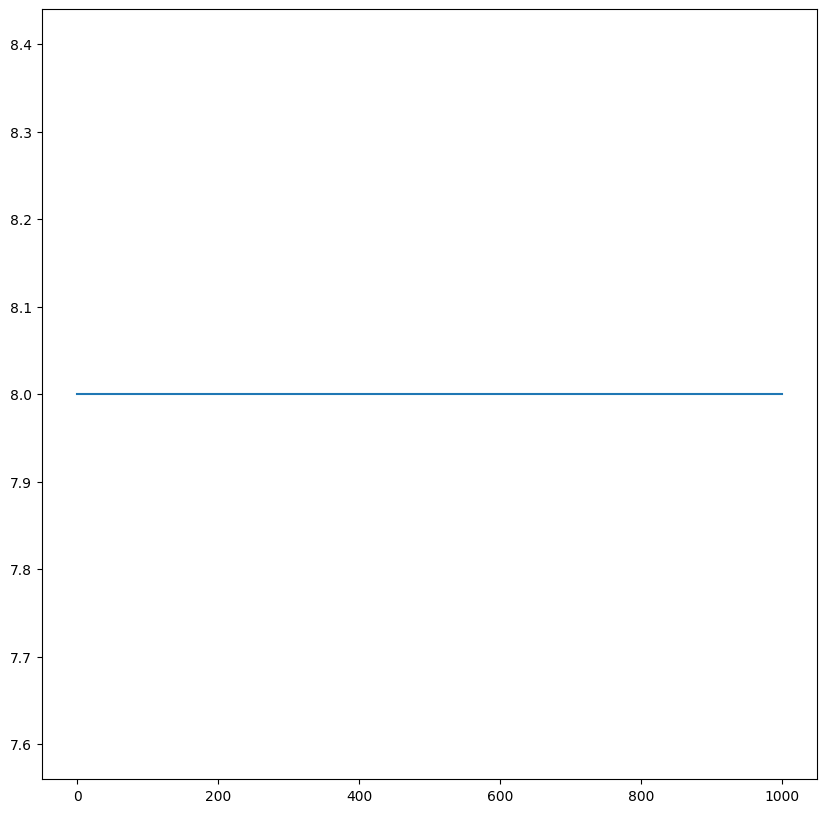

In [267]:
plt.figure(figsize=(10,10))
plt.plot([d for _, d in D_best])

So, the best design by `D-Optimal Criterion` is:

In [268]:
D_best[-1][0]

array([[1, 1, 0],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 1],
       [0, 1, 1],
       [0, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [242]:
2**3

8